# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [1]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data   


Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [2]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE
class Node:
    def __init__(self, val):
        self.val = val
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def show(self):
        current = self.head
        while(current is not None):
            print(current.val)
            current = current.next    

Use the cell below to implement the requested API by means of **sequential search**.

In [3]:
class SequentialSearchSet(AbstractSet):
    
    def __init__(self):   
        self.set = []
        
    def insertElement(self, element):
        inserted = False
        for item in self.set:
            if item == element:
                return inserted

        self.set.append(element)
        inserted = True
        return inserted


    def searchElement(self, element):
        for item in self.set:
            if element == item:
                return True
        return False

Use the cell below to implement the requested API by means of **binary search tree**.

In [4]:
class BSNode:
    def __init__(self, element):
        self.element = element
        self.left = None
        self.right = None

class BinarySearchTreeSet(AbstractSet):

    def __init__(self):
        self.root = None

    def insertElement(self, element):
        if self.root == None:
            self.root = BSNode(element)
            return True

        current = self.root
        while True:
            if element < current.element:
                if current.left is None:
                    current.left = BSNode(element)
                    return True
                else:
                    current = current.left
            elif element > current.element:
                if current.right is None:
                    current.right = BSNode(element)
                    return True
                else:
                    current = current.right
            else:
                return False

    def searchElement(self, element):
        if self.root == None:
            return False
        else:
            current = self.root
            while current is not None:
                if element == current.element:
                    return True
                elif element < current.element:
                    current = current.left
                else:
                    current = current.right
            return False

Use the cell below to implement the requested API by means of **balanced search tree**.

In [5]:
RED = True
BLACK = False

# Node class
class RBNode: # DID NOT ADD TO MAIN NODE CLASS AS THIS REQUIRES MORE ATTRIBUTES
    def __init__(self, value, colour=RED):
        self.value = value
        self.colour = colour
        self.left = None # left child
        self.right = None # right child
        self.parent = None

    def __repr__(self):
        return f"{self.value}({self.colour})"

    def __iter__(self):
        if self.left:
            yield from self.left
        yield self.value
        if self.right:
            yield from self.right

    def grandparent(self):
        if self.parent:
            return self.parent.parent

    def uncle(self):
        if self.grandparent():
            if self.grandparent().left == self.parent:
                return self.grandparent().right
            else:
                return self.grandparent().left

    def sibling(self):
        if self.parent:
            if self.parent.left == self:
                return self.parent.right
            else:
                return self.parent.left


# Red Black Tree class
class BalancedSearchTreeSet(AbstractSet):
    
    def __init__(self):
        self.root = None

    def __repr__(self):
        return str([v for v in self])

    def __iter__(self):
        if self.root:
            yield from self.root

    def __contains__(self, value):
        if self.root is None:
            return False
        else:
            current = self.root
            while current is not None:
                if value == current.value:
                    return True
                elif value < current.value:
                    current = current.left
                else:
                   current = current.right
            return False

        
    def insertElement(self, element):
        inserted = True

        node = RBNode(element)
        if self.root is None:
            self.root = node
            self.root.colour = BLACK
        else:
            current = self.root
            while True:
                if node.value < current.value:
                    if current.left is None:
                        current.left = node
                        node.parent = current
                        break
                    else:
                        current = current.left

                elif node.value == current.value:
                    inserted = False
                    break

                else:
                    if current.right is None:
                        current.right = node
                        node.parent = current
                        break
                    else:
                        current = current.right

            self._fixup(node)
        
        return inserted
    
    def _fixup(self, node : RBNode):
        # case 1: node is root
        if node.parent is None:
            node.colour = BLACK
            return

        # case 2: parent is black
        if node.parent.colour == BLACK:
            return

        # case 3: parent and uncle are red
        if node.uncle() and node.uncle().colour == RED:
            node.parent.colour = BLACK
            node.uncle().colour = BLACK
            node.grandparent().colour = RED
            self._fixup(node.grandparent())
            return

        # case 4: parent is red, uncle is black
        else:
            # case 4a: node is right child, parent is left child
            if node.parent.right == node and node.grandparent().left == node.parent:
                self._rotate_left(node.parent)
                node = node.left

            # case 4b: node is left child, parent is right child
            elif node.parent.left == node and node.grandparent().right == node.parent:
                self._rotate_right(node.parent)
                node = node.right

            # case 5: node is left child, parent is left child or node is right child, parent is right child
            node.parent.colour = BLACK
            node.grandparent().colour = RED
            if node.parent.left == node and node.grandparent().left == node.parent:
                self._rotate_right(node.grandparent())
            else:
                self._rotate_left(node.grandparent())


    def _rotate_left(self, node: RBNode):
        new_parent = node.right
        node.right = new_parent.left
        if new_parent.left:
            new_parent.left.parent = node
        new_parent.parent = node.parent
        if node.parent is None:
            self.root = new_parent
        elif node == node.parent.left:
            node.parent.left = new_parent
        else:
            node.parent.right = new_parent
        new_parent.left = node
        node.parent = new_parent

    def _rotate_right(self, node: RBNode):
        new_parent = node.left
        node.left = new_parent.right
        if new_parent.right:
            new_parent.right.parent = node
        new_parent.parent = node.parent
        if node.parent is None:
            self.root = new_parent
        elif node == node.parent.left:
            node.parent.left = new_parent
        else:
            node.parent.right = new_parent
        new_parent.right = node
        node.parent = new_parent

    def searchElement(self, element):     
        return element in self

Use the cell below to implement the requested API by means of **bloom filter**.

In [6]:
from bitarray import bitarray

# calculate natural logarithm
def ln(x):
    n = 1000.0
    return n * ((x ** (1/n)) - 1)

# get size of bitarray
def get_size(num_of_items, fp_prob):
        size = -(num_of_items * ln(fp_prob)) / (ln(2) ** 2)
        return int(size)

# get number of hash function to be used
def get_hash_num(bitarray_size, num_of_items):
    hash_num = (bitarray_size / num_of_items) * ln(2)
    return int(hash_num)

# Murmurhash3 32bits version
# reference: https://huagetai.github.io/posts/fcfde8ff/
def murmurhash3_32(key, seed=0):
    data = bytearray(key.encode('utf-8'))
    length = len(data)
    nblocks = (length // 4) * 4

    h1 = seed
    c1 = 0xcc9e2d51
    c2 = 0x1b873593

    # body
    for i in range(0, nblocks, 4):
        k1 = data[i+3] << 24 | data[i+2] << 16 | data[i+1] << 8 | data[i]
        k1 *= c1
        k1 &= 0xffffffff
        k1 = (k1 << 15) | (k1 >> 17)
        k1 *= c2

        h1 ^= k1
        h1 &= 0xffffffff
        h1 = (h1 << 13) | (h1 >> 19)
        h1 = h1*5+0xe6546b64
        h1 &= 0xffffffff

    # tail
    tail = data[nblocks:]
    k1 = 0
    for i, b in enumerate(tail):
        k1 |= b << (8*i)

    k1 *= c1
    k1 &= 0xffffffff
    k1 = (k1 << 15) | (k1 >> 17)
    k1 *= c2
    h1 ^= k1
    h1 &= 0xffffffff

    # finalization
    h1 ^= length
    h1 ^= h1 >> 16
    h1 *= 0x85ebca6b
    h1 ^= h1 >> 13
    h1 *= 0xc2b2ae35
    h1 ^= h1 >> 16

    return h1 & 0xffffffff

def modified_hash(obj, seed):
    return (hash(obj) ^ seed) & 0xffffffff

def str_hash(s):
    h = 0
    for c in s:
        h = (31 * h + hash(c)) & 0xffffffff
    return ((h + 0x80000000) & 0xffffffff) - 0x80000000

class BloomFilterSet(AbstractSet):
    def __init__(self):
        # ADD YOUR CODE HERE
        self.size = 0
        self.hash_num = 0
        self.bit_array = bitarray()
        self.create_bloom_filter()

    def create_bloom_filter(self, num_of_items=800000, fp_prob=0.05):
        self.size = get_size(num_of_items, fp_prob)
        self.hash_num = get_hash_num(self.size, num_of_items)
        self.bit_array = bitarray(self.size)
        self.bit_array.setall(0)

    def insertElement(self, element):
        # ADD YOUR CODE HERE
        hash_val = hash(element)
        # print("hash: ", hash_val)
        delta = (hash_val >> 17) | (hash_val << 15)
        # print("delta: ", delta)
        for i in range(self.hash_num):
            bit_pos = hash_val % self.size
            # print(bit_pos)
            self.bit_array[bit_pos] = 1
            hash_val += delta
        return True
    

    def searchElement(self, element):     
        hash_val = hash(element)
        # print("hash: ", hash_val)
        delta = (hash_val >> 17) | (hash_val << 15)
        # print("delta", delta)
        for i in range(self.hash_num):
            bit_pos = hash_val % self.size
            # print(bit_pos)
            if self.bit_array[bit_pos] == 0:
                 return False
            hash_val += delta
        return True

In [13]:
import string
import random

class TestDataGenerator(AbstractTestDataGenerator):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        self.letters = string.ascii_lowercase
        random.seed(a=None)
        
    def generateData(self, size):     
        # ADD YOUR CODE HERE
        data = []
        for i in range(0, size):
            num = random.randint(1, 6)
            wrd = ""
            for j in range(num):
                wrd = wrd + random.choice(self.letters)
            data.append(wrd)
        return data

Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thoroughly experiment with insert/search operations and measure their performance).

In [46]:
import timeit
import matplotlib.pyplot as plt

'''
    To use this TestClass:
    1. **ONLY INSERT PARAMETERS IF USING REAL DATA** Create an instance of the class with test_data
       and validation_data inserted as parameters,each having been passed through the txt_to_array
       function. Additionally, insert "real" as the test_type parameter. If doing synthetic tests,
       do not insert any parameters.
    2. Call all_test() with "insert" or "search" as the parameter. This will either run a search
       test or an insert test. The results will be shown as a graph.
    3. Feel gree to tweak and modify code to give better results. i.e. so that Sequential is not
       included in the graph as it skews the axis too much.
    p.s. The dickens text takes very long to insert and other tests may take a while too.
'''
def txt_to_array(file_name : str) -> list:
    array = []
    with open(file_name, "r") as f:
        for line in f:
            for word in line.split():
                array.append(word)
    return array


def _helper(seq_times : list, bin_times : list, bal_times : list, blm_times : list, output, struct):
    if struct == "Sequential":
        seq_times.append(output)
    elif struct == "Binary":
        bin_times.append(output)
    elif struct == "Balanced":
        bal_times.append(output)
    elif struct == "Bloom":
        blm_times.append(output)
    else:
        raise Exception("Invalid data structure")


class TestClass:
    def __init__(self, test_data=None, validation_data=None, test_type="synthetic"):
        self.insert_data = test_data
        self.search_data = validation_data
        self.test_type = test_type
        self.gen = TestDataGenerator()
        self.sequential = SequentialSearchSet()
        self.binary = BinarySearchTreeSet()
        self.balanced = BalancedSearchTreeSet()
        self.bloom = BloomFilterSet()

    def all_test(self, test_func = "insert"):
        seq_times, bin_times, bal_times, blm_times = [], [], [], []
        struct_types = ["Sequential", "Binary", "Balanced", "Bloom"]

        if self.test_type == "synthetic":
            sizes = []
            for i in range(0, 2):
                sizes.append(5000 * i)
            for size in sizes:
                print("size: " + str(size))
                self.sequential, self.binary, self.balanced, self.bloom = SequentialSearchSet(), BinarySearchTreeSet(), BalancedSearchTreeSet(), BloomFilterSet() # reset structures
                if size >= 0 and "Sequential" in struct_types:
                    struct_types.remove("Sequential")

                self.insert_data = self.gen.generateData(size)
                self.search_data = self.gen.generateData(int(size/10))
                if test_func.lower() == "insert":
                    for struct in struct_types:
                        tim = timeit.timeit(stmt=lambda: self.insert_test(struct), number=1)
                        _helper(seq_times, bin_times, bal_times, blm_times, tim, struct)
                elif test_func.lower() == "search":
                    for struct in struct_types:
                        tim = timeit.timeit(stmt=lambda: self.search_test(struct), setup=lambda: self.insert_test(struct), number=1)
                        _helper(seq_times, bin_times, bal_times, blm_times, tim, struct)
                else:
                    raise Exception("invalid test function")

            while len(seq_times) < len(sizes):
                seq_times.append(0)

        elif self.test_type == "real":
            print("real")
            if test_func == "insert":
                sizes = len(self.insert_data)
                for struct in struct_types:
                    tim = timeit.timeit(stmt=lambda: self.insert_test(struct), number=1)
                    _helper(seq_times, bin_times, bal_times, blm_times, tim, struct)
            elif test_func == "search":
                sizes = len(self.search_data)
                self.sequential, self.binary, self.balanced, self.bloom = SequentialSearchSet(), BinarySearchTreeSet(), BalancedSearchTreeSet(), BloomFilterSet() # reset structures
                for struct in struct_types:

                    tim = timeit.timeit(stmt=lambda: self.search_test(struct), setup=lambda: self.insert_test(struct), number=1)
                    _helper(seq_times, bin_times, bal_times, blm_times, tim, struct)
            else:
                raise Exception("invalid test function")
        return sizes, seq_times, bin_times, bal_times, blm_times

    def insert_test(self, struct):
        print("inserting")
        if struct == "Sequential":
            for item in self.insert_data:
                self.sequential.insertElement(item)
        elif struct == "Binary":
            for item in self.insert_data:
                self.binary.insertElement(item)
        elif struct == "Balanced":
            for item in self.insert_data:
                self.balanced.insertElement(item)
        elif struct == "Bloom":
            for item in self.insert_data:
                self.bloom.insertElement(item)
        else:
            raise Exception("Invalid data structure")

    def search_test(self, struct):
        print("searching")
        if struct == "Sequential":
            for item in self.search_data:
                self.sequential.searchElement(item)
        elif struct == "Binary":
            for item in self.search_data:
                self.binary.searchElement(item)
        elif struct == "Balanced":
            for item in self.search_data:
                self.balanced.searchElement(item)
        elif struct == "Bloom":
            for item in self.search_data:
                self.bloom.searchElement(item)
        else:
            raise Exception("Invalid data structure")

In [52]:
class WorstCaseSeqTest(TestClass):
    def __init__(self):
        super().__init__()
        self.sequential_worst = SequentialSearchSet()

    def make_data_worst(self, size):
        self.search_data = []
        for j in range(0, int(size/10)):
            word = self.gen.generateData(1)[0]
            while word in self.insert_data:
                word = self.gen.generateData(1)[0]
            self.search_data.append(word)


    def insert_test(self, struct):
        print("inserting")
        if struct == "average":
            for item in self.insert_data:
                self.sequential.insertElement(item)
        elif struct == "worst":
            for item in self.insert_data:
                self.sequential_worst.insertElement(item)
        else:
            raise Exception("Invalid data structure")

    def search_test(self, struct):
        print("searching")
        if struct == "average":
            for item in self.search_data:
                self.sequential.searchElement(item)
        elif struct == "worst":
            for item in self.search_data:
                self.sequential_worst.searchElement(item)
        else:
            raise Exception("Invalid data structure")

    def all_test(self, test_func = "search"):
        average_times, worst_times= [], []
        struct_types = ["average", "worst"]

        if self.test_type == "synthetic":
            sizes = []
            for i in range(1, 10):
                sizes.append(10000 * i)
            for size in sizes:
                print("size: " + str(size))
                self.sequential, self.sequential_worst = SequentialSearchSet(), SequentialSearchSet() # reset structures
                self.insert_data = self.gen.generateData(size)
                self.search_data = self.gen.generateData(int(size/10))

                if test_func.lower() == "search":
                    for struct in struct_types:

                        if struct == "worst":
                            self.make_data_worst(size)

                        tim = timeit.timeit(stmt=lambda: self.search_test(struct), setup=lambda: self.insert_test(struct), number=1)
                        if struct == "average":
                            average_times.append(tim)
                        elif struct == "worst":
                            worst_times.append(tim)
                        else:
                            raise Exception("Invalid data structure")
                else:
                    raise Exception("invalid test function")

            return sizes, average_times, worst_times

In [48]:
class WorstCaseBinTest(TestClass):
    def __init__(self):
        super().__init__()
        self.binary_worst = BinarySearchTreeSet()

    def insert_test(self, struct):
        print("inserting")
        if struct == "average":
            for item in self.insert_data:
                self.binary.insertElement(item)
        elif struct == "worst":
            for search in self.search_data:
                if search in self.insert_data:
                    self.search_data.remove(search)
                    self.search_data + self.gen.generateData(1)
            self.insert_data.sort()
            for item in self.insert_data:
                self.binary_worst.insertElement(item)
        else:
            raise Exception("Invalid data structure")

    def search_test(self, struct):
        print("searching")
        if struct == "average":
            for item in self.search_data:
                self.binary.searchElement(item)
        elif struct == "worst":
            for item in self.search_data:
                self.binary_worst.searchElement(item)

    def all_test(self, test_func = "search"):
        average_times, worst_times= [], []
        struct_types = ["average", "worst"]

        if self.test_type == "synthetic":
            sizes = []
            for i in range(1, 3):
                sizes.append(10000 * i)
            for size in sizes:
                print("size: " + str(size))
                self.binary, self.binary_worst = BinarySearchTreeSet(), BinarySearchTreeSet() # reset structures
                self.insert_data = self.gen.generateData(size)
                self.search_data = self.gen.generateData(int(size/10))

                if test_func.lower() == "search":
                    for struct in struct_types:
                        tim = timeit.timeit(stmt=lambda: self.search_test(struct), setup=lambda: self.insert_test(struct), number=1)
                        if struct == "average":
                            average_times.append(tim)
                        elif struct == "worst":
                            worst_times.append(tim)
                        else:
                            raise Exception("Invalid data structure")
                else:
                    raise Exception("invalid test function")

            return sizes, average_times, worst_times

In [ ]:
def test_bloom_filter_accuracy(data_insert, data_search):
    exist = set()
    correct = set()
    bf3 = BloomFilterSet()
    for word in data_insert:
        bf3.insertElement(word)
            # print(bf3.searchElement(word))

    for word in data_search:
        if bf3.searchElement(word):
            exist.add(word)
            if word in data_insert:
                correct.add(word)
    print(len(correct), len(exist))
    return 0 if len(correct)==len(exist) else 1 - (len(correct))/ (len(exist))

In [ ]:
import timeit

# ADD YOUR TEST CODE HERE TO WORK ON REAL DATA

def generic_test_insert(data_set, file_or_virtual, real_test=True):
    if data_set == BloomFilterSet:
        test_set = BloomFilterSet()
        test_set.create_bloom_filter()
    test_set = data_set()
    if real_test:
        with open(file_or_virtual, "r") as f:
            for line in f:
                for word in line.split():
                    test_set.insertElement(word)
    else:
        for item in file_or_virtual:
            test_set.insertElement(item)
    return test_set

def generic_test_search(inserted_set_var, file_or_virtual, real_test=True):
    if real_test:
        with open(file_or_virtual, "r") as f:
            for word in f:
                target = word.strip()
                inserted_set_var.searchElement(target)
    else:
        for item in file_or_virtual:
            inserted_set_var.searchElement(item)


In [ ]:
with open("test1-mobydick.txt", "r") as f:
    bf2 = BloomFilterSet()
    conflict = 0
    total_num1 = 0
    for line in f:
        for word in line.split():
            total_num1 += 1
            bf2.insertElement(word)
exist = set()
correct = set()
with open("test-search.txt", "r") as f:
    for word in f:
        target = word.strip()
        if bf2.searchElement(target):
            exist.add(target)
with open("test1-mobydick.txt", "r") as f:
    for line in f:
        for item in exist:
            if line.find(item) != -1:
                correct.add(item)
if len(correct) == len(exist):
    test1_accuracy = 0
else:
    test1_accuracy = 1 - (len(correct))/ (len(exist))

with open("test2-warpeace.txt", "r") as f:
    bf = BloomFilterSet()
    conflict = 0
    total_num2 = 0
    for line in f:
        for word in line.split():
            total_num2 += 1
            bf.insertElement(word)

exist = set()
correct = set()
with open("test-search.txt", "r") as f:
    for word in f:
        target = word.strip()
        if bf.searchElement(target):
            exist.add(target)
with open("test2-warpeace.txt", "r") as f:
    for line in f:
        for item in exist:
            if line.find(item) != -1:
                correct.add(item)
if len(correct) == len(exist):
    test2_accuracy = 0
else:
    test2_accuracy = 1 - (len(correct))/ (len(exist))

real_sizes = [total_num1, total_num2]
real_accuracies = [test1_accuracy, test2_accuracy]

In [ ]:
def test_real_time(data_set):
    test_search_file = "test-search.txt"
    test_insert_file1 = "test1-mobydick.txt"
    test_insert_file2 = "test2-warpeace.txt"
    stmt_insertion1 = 'test_set = generic_test_insert({}, "{}")'.format(data_set.__name__, test_insert_file1)
    setup_insertion1 = 'from __main__ import generic_test_insert, {}'.format(data_set.__name__)
    stmt_search1 = 'generic_test_search(a, "{}")'.format(test_insert_file1)
    setup_search1 = 'from __main__ import generic_test_search, generic_test_insert, {}; a={}'.format(data_set.__name__, stmt_insertion1)
    stmt_insertion2 = 'test_set = generic_test_insert({}, "{}")'.format(data_set.__name__, test_insert_file2)
    setup_insertion2 = 'from __main__ import generic_test_insert, {}'.format(data_set.__name__)
    stmt_search2 = 'generic_test_search(a, "{}")'.format(test_insert_file2)
    setup_search2 = 'from __main__ import generic_test_search, generic_test_insert, {}; a={}'.format(data_set.__name__, stmt_insertion2)
    return [timeit.timeit(stmt=stmt_insertion1, setup=setup_insertion1, number=1), timeit.timeit(stmt=stmt_insertion2, setup=setup_insertion2, number=1)], [timeit.timeit(stmt=stmt_search1, setup=setup_search1, number=1), timeit.timeit(stmt=stmt_search2, setup=setup_search2, number=1)]

In [ ]:
import timeit
def test_time(data_set, data_insert, data_search):
    print(len(data_insert), len(data_search))
    stmt_insertion = 'test_set = generic_test_insert({}, {}, False)'.format(data_set.__name__, data_insert)
    setup_insertion = 'from __main__ import generic_test_insert, {}'.format(data_set.__name__)
    stmt_search = 'generic_test_search(a, {}, False)'.format(data_search)
    setup_search = 'from __main__ import generic_test_search, generic_test_insert, {};  a={}'.format(data_set.__name__, stmt_insertion)
    return timeit.timeit(stmt=stmt_insertion, setup=setup_insertion, number=1), timeit.timeit(stmt=stmt_search, setup=setup_search, number=1)


In [ ]:
insert = 10000
inserts = []
accuracies = []
insert_times = []
search_times = []
count = 5
while count <= 60:
    gen = TestDataGenerator()
    data_insert = gen.generateData(insert*count)
    data_search = gen.generateData(insert*count//20) + data_insert[:insert*count//20]
    cur_num = insert * count
    cur_acc = test_bloom_filter_accuracy(data_insert, data_search)
    insert_time, search_time = test_time(BloomFilterSet, data_insert, data_search)
    inserts.append(cur_num)
    accuracies.append(cur_acc)
    insert_times.append(insert_time)
    search_times.append(search_time)
    count += 5
real_inserts, real_searchs = test_real_time(BloomFilterSet)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

plt.plot(inserts, accuracies, color='c', label='synthetic')
plt.plot(real_sizes, real_accuracies, color='r', label='real')
plt.title("BloomFilterSet")
plt.xlabel("Size of data")
plt.ylabel("False positive probability")
plt.legend()

In [ ]:
plt.plot(inserts, insert_times, color='c', label='synthetic')
plt.plot(real_sizes, real_inserts, color='r', label='real')
plt.title("BloomFilterSet")
plt.xlabel("Size of data")
plt.ylabel("Insert time")
plt.legend()

In [ ]:
plt.plot(inserts, search_times, color='c', label='synthetic')
plt.plot(real_sizes, real_searchs, color='r', label='real')
plt.title("BloomFilterSet")
plt.xlabel("Size of data")
plt.ylabel("Search time")
plt.legend()

real
inserting
inserting
inserting
inserting


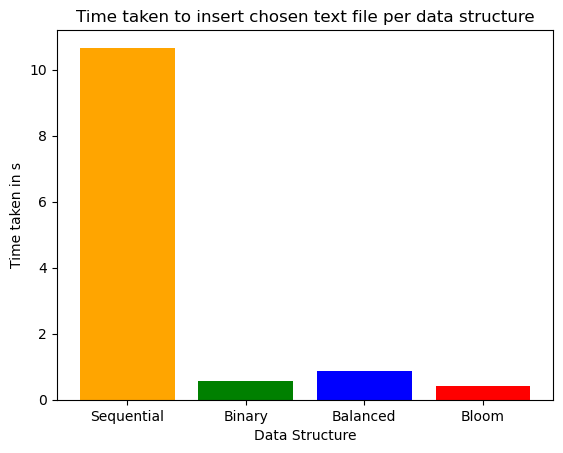

real
inserting
searching
inserting
searching
inserting
searching
inserting
searching


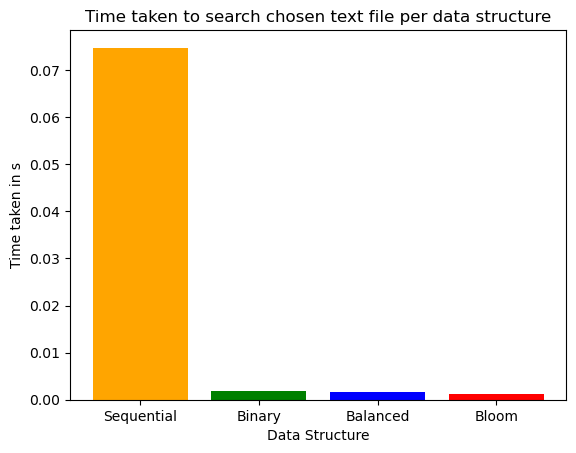

In [45]:
def plot_real(insert_file, search_file, method):
    te = TestClass(txt_to_array(insert_file), txt_to_array(search_file), "real")
    sizes, seq_times, bin_times, bal_times, blm_times = te.all_test(method)
    values_in_order = seq_times + bin_times + bal_times + blm_times
    plt.bar(["Sequential", "Binary", "Balanced", "Bloom"], values_in_order, color=['orange', 'green', 'blue', 'red'])
    plt.xlabel("Data Structure")
    plt.ylabel("Time taken in s")
    plt.title("Time taken to " + method + " chosen text file per data structure")
    plt.show()
plot_real("test1-mobydick.txt", "test-search.txt", "insert")
plot_real("test1-mobydick.txt", "test-search.txt", "search")

size: 0
inserting
inserting
inserting
size: 5000
inserting
inserting
inserting


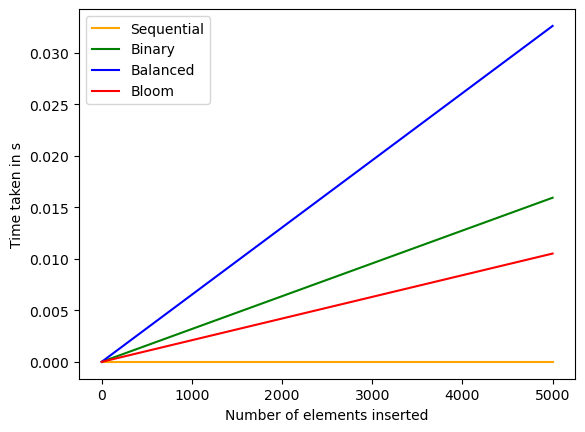

size: 0
inserting
searching
inserting
searching
inserting
searching
size: 5000
inserting
searching
inserting
searching
inserting
searching


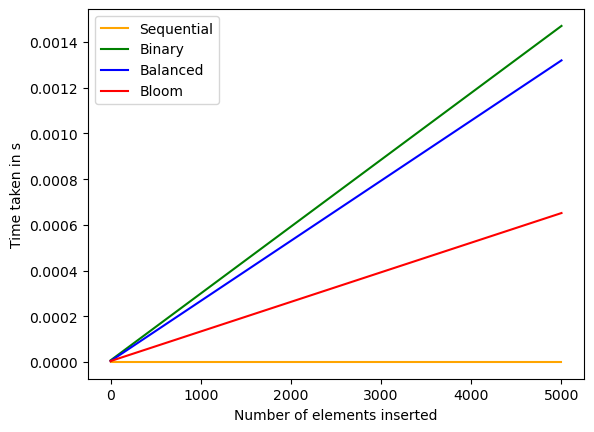

In [47]:
def plot_synthetic(method):
    te = TestClass()
    sizes, seq_times, bin_times, bal_times, blm_times = te.all_test(method)
    plt.plot(sizes, seq_times, color='orange', label="Sequential")
    plt.plot(sizes, bin_times, color='green', label="Binary")
    plt.plot(sizes, bal_times, color='blue', label="Balanced")
    plt.plot(sizes, blm_times, color='red', label='Bloom')

    plt.xlabel("Number of elements inserted")
    plt.ylabel("Time taken in s")
    plt.legend()
    plt.show()
plot_synthetic("insert")
plot_synthetic("search")

size: 10000
inserting
searching
inserting
searching
size: 20000
inserting
searching
inserting
searching


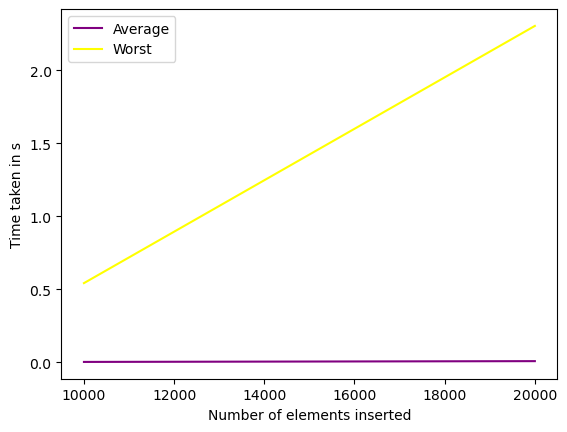

In [51]:
def plot_comparison(set_type):
    if set_type == "Sequential":
        te = WorstCaseSeqTest()
    elif set_type == "Binary":
        te = WorstCaseBinTest()
    else:
        return
    sizes, average_times, worst_times = te.all_test("search")
    plt.plot(sizes, average_times, color='purple', label="Average")
    plt.plot(sizes, worst_times, color='yellow', label="Worst")

    plt.xlabel("Number of elements inserted")
    plt.ylabel("Time taken in s")
    plt.legend()
    plt.show()
plot_comparison("Sequential")
plot_comparison("Binary")